

# Project: Investigate a Dataset - [tmdb-movies.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [142]:
import pandas as pd
import numpy as np 
# import matplotlib as plt 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline


<a id='intro'></a>
## Introduction

I chose *TMDB movie data* which contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. In this project, I will analyze a dataset and then communicate my findings about it. I will use the Python libraries NumPy, pandas,seaborn and Matplotlib to make my analysis easier.
<br><br>
*Question:*
1. Which movie genre are the most popular ?
2. Who are the top 10 most famous actors?
3. Which movie has the most revenue ?
4. Which year has the highest number of movie released ?




<a id='wrangling'></a>
## Data Wrangling

In [143]:
movies=pd.read_csv('tmdb-movies.csv')
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [144]:
movie=movies.fillna(movies["budget"].mean())
movies[movies["budget"]==0].head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00


In [145]:
movies.shape

(10866, 21)

Dataset has 10866 rows and 21 column

In [146]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

I removed the columns homepage, tagline, keywords, overview and imdb id to improve database redability.

In [147]:
movies=movies.drop(['homepage', 'tagline', 'keywords', 'overview', 'imdb_id'], axis=1)

 Check and remove duplicate

In [148]:
sum(movies.duplicated())

1

In [149]:
movies.drop_duplicates()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


Check and remove all null column

In [150]:
movies.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [151]:
movies.dropna(inplace=True)

I will change data type of column **release_year** from  *int64*  to *datetime*

In [152]:
movies['release_year']=pd.to_datetime(movies['release_year'],format='%Y')
movies.head(4)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015-01-01,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015-01-01,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015-01-01,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015-01-01,1.839999e+08,1.902723e+09


In [153]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9773 non-null   int64         
 1   popularity            9773 non-null   float64       
 2   budget                9773 non-null   int64         
 3   revenue               9773 non-null   int64         
 4   original_title        9773 non-null   object        
 5   cast                  9773 non-null   object        
 6   director              9773 non-null   object        
 7   runtime               9773 non-null   int64         
 8   genres                9773 non-null   object        
 9   production_companies  9773 non-null   object        
 10  release_date          9773 non-null   object        
 11  vote_count            9773 non-null   int64         
 12  vote_average          9773 non-null   float64       
 13  release_year     

## Summary the data cleaning 
    1. Drop column homepage, tagline,keywords,overview, imdb_id
    2. Check and remove duplicate
    3. Check and remove null value
    4. Change the date type of column release_year

<a id='eda'></a>
## Exploratory Data Analysis

 ### 1. Which movie genre are the most popular ?

In [154]:
def divide(col_name):
    divide=movies[col_name].str.cat(sep = '|')
    divide=pd.Series(divide.split('|'))
    frequency = divide.value_counts(ascending = False)

    return frequency


In [155]:
genres=divide('genres')

Text(0, 0.5, 'Number of appearance in movies')

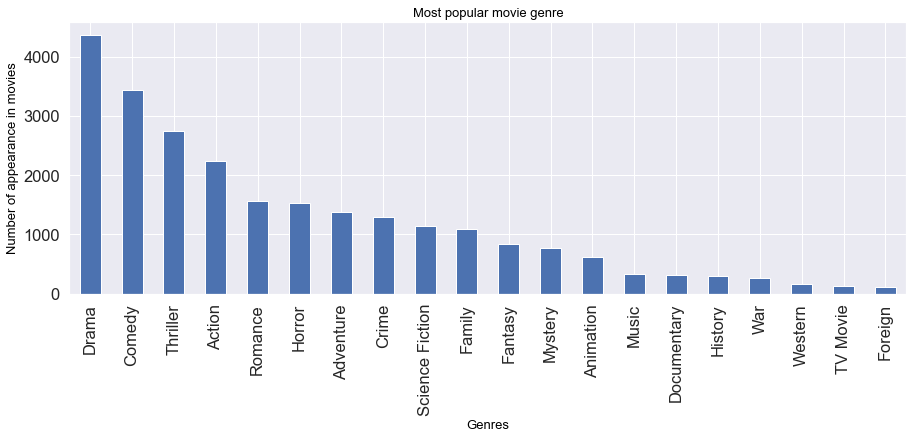

In [156]:
genres.plot.bar(figsize=(15,5))

#Add labels
plt.title('Most popular movie genre', color = 'black', fontsize = '13')
plt.xlabel('Genres', color = 'black', fontsize = '13')
plt.ylabel('Number of appearance in movies', color = 'black', fontsize = '13')


=> Drama is the most popular genres

### 2. Who are the top 10 most famous actors?


In [157]:
movies.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015-01-01,1.379999e+08,1.392446e+09


In [158]:
cast=divide('cast').head(10)

Text(0, 0.5, 'Number of appearance in movies')

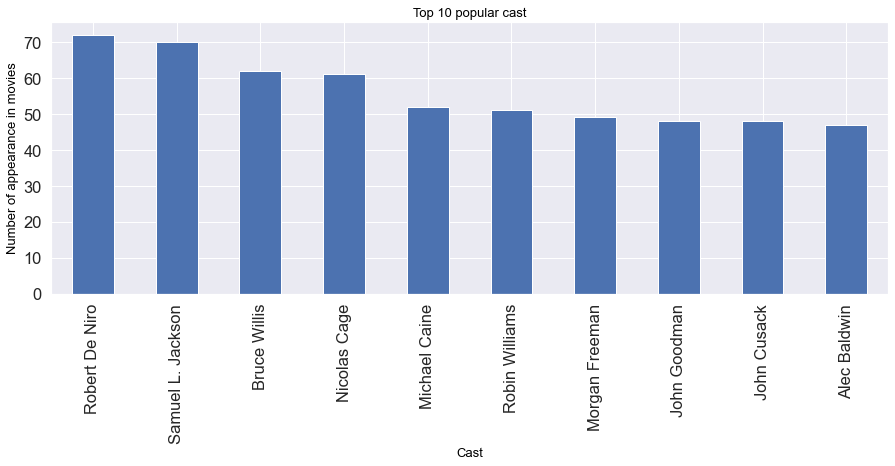

In [159]:
cast.plot.bar(figsize=(15,5))
#Add labels
plt.title('Top 10 popular cast', color = 'black', fontsize = '13')
plt.xlabel('Cast', color = 'black', fontsize = '13')
plt.ylabel('Number of appearance in movies', color = 'black', fontsize = '13')

=> Matt Damon is the most popular cast in this dataset

### 3. Which movie has the most revenue ?

In [160]:
top10_revenue=movies.sort_values('revenue',ascending=False).head(10)
movies_new=top10_revenue[['original_title','revenue']]

Text(0.5, 1.0, 'Top 10 Movies by Revenue')

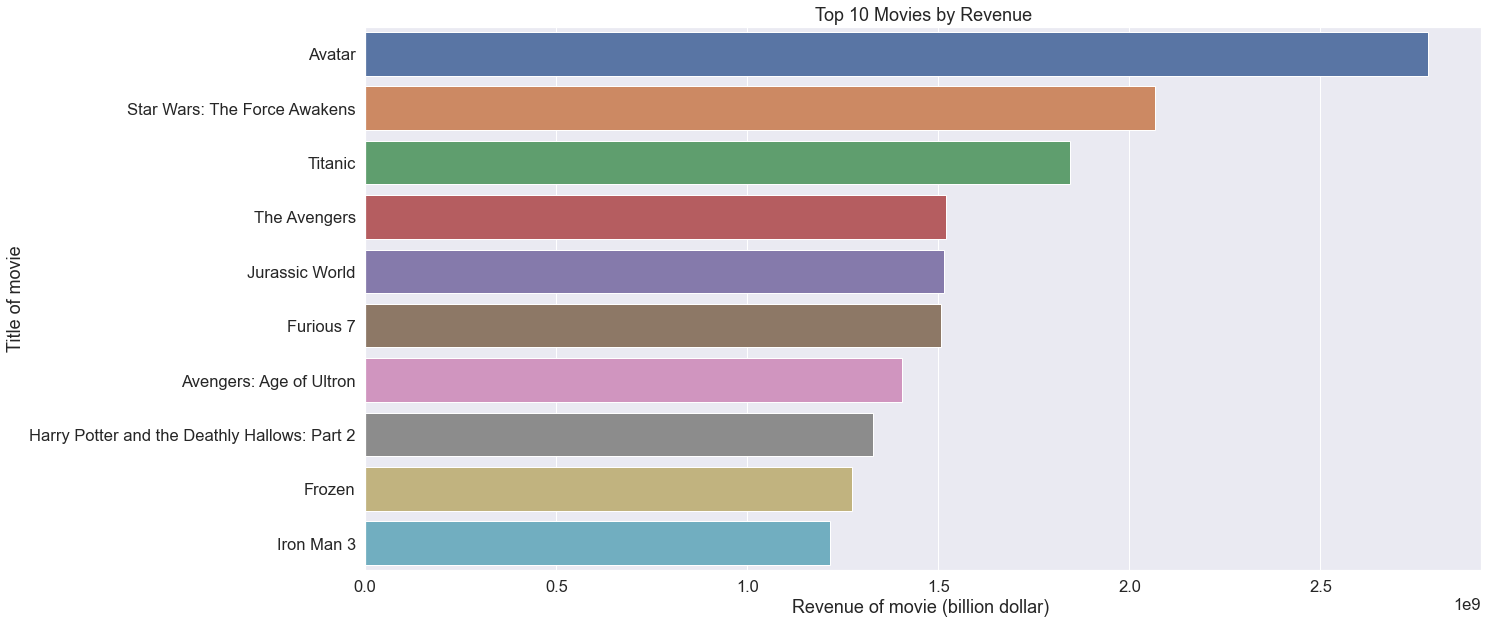

In [161]:
 #Plot the top 10 movies
sns.set(font_scale=1.5);
f, ax = plt.subplots(figsize=(20, 10));
ax = sns.barplot(x=top10_revenue['revenue'], y=top10_revenue['original_title'], data=top10_revenue)

ax.set(ylabel="Title of movie", xlabel="Revenue of movie (billion dollar) ")
plt.title('Top 10 Movies by Revenue')

=> Avata is movie which has the highest revenue

###  4. Which year has the highest number of movie released ?

In [162]:
year_movie = movies.groupby('release_year')['original_title'].count()
year_movie.head()

release_year
1960-01-01    32
1961-01-01    30
1962-01-01    30
1963-01-01    34
1964-01-01    41
Name: original_title, dtype: int64

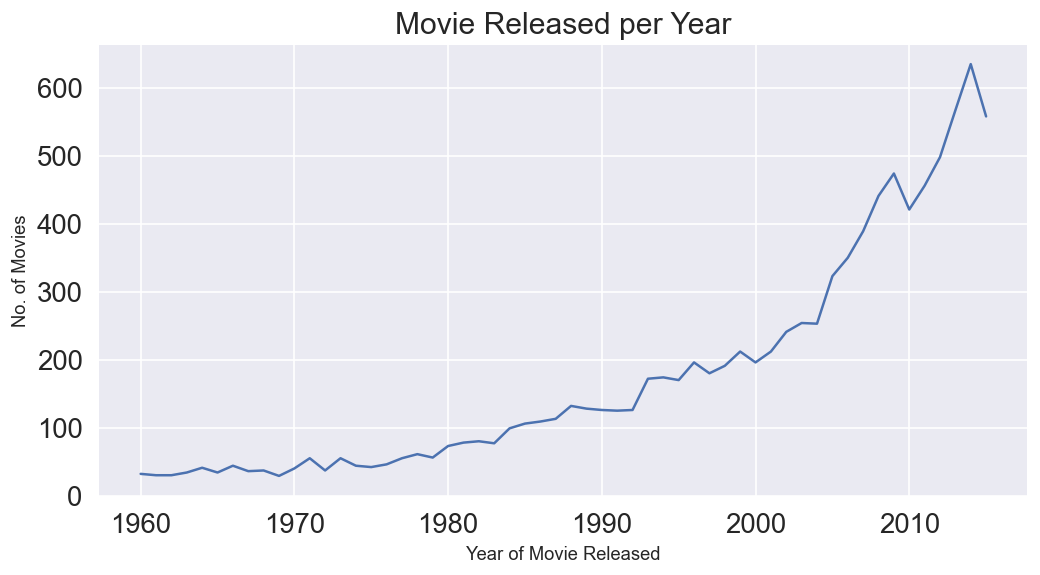

In [163]:
# Figure size(width, height)
plt.figure(figsize=(10,5), dpi = 120)

# x-axis
plt.xlabel('Year of Movie Released', fontsize = 11)
# y-axis
plt.ylabel('No. of Movies', fontsize = 11)
# Title
plt.title('Movie Released per Year')

# Plot Line chart
plt.plot(year_movie)

# Display plot
plt.show()

=> The above plot shows there is a yearly increase in movie produced, with year 2011 showing the highest movie produced. And after 2011 there was a significant drop in movie produced.

<a id='conclusions'></a>
## Conclusions

1. From 1960 to 2015: Drama was the most popular genre. Next is comedy

2. Matt Damon is the most popular cast in this dataset

3. I also analysis which movie has the highest revenue. Avatar tops that list

4. I have check the yearly trend of realeased, and noticely a yearly increase in the trend.It also featured year 2011 which is the year with the highest number of movie released with over 200 movies produced. While year 1960 had the lowest.

### Limitations
1. I had drop some rows because it has null value. So it can be affect to my analysis
2. In this movie dataet, movie could not be updated so my exploration base on the old data mean the old movie. So the newer ones could potentially change my analysis.